<b><font size=6 color=mediumblue>Laboratory I – Part A</font></b>

## Welcome to your ocean first OCP 5050 Laboratory!
In this lab you'll have a chance to further explore the structure of ocean water masses by plotting maps and sections of various ocean properties and linking what you see to what you know so far about how the ocean is forced and how it moves
### <font color='mediumblue'>Learning Goals</font>
By the end of this notebook, you will
1. Plot sections of temperature, salinity, and oxygen as well as T-S diagrams in the Atlantic and Pacific Oceans
2. Identify major water masses based on the above properties
3. Look at property differences across the Atlantic and Pacific oceans
4. Write down some basic notes about what you see in your figures to prepare you for your lab report

---
# Part I: Gathering what you need
## 1. Background information
1. The data: we'll be using data from the [World Ocean Atlas 2023](https://www.ncei.noaa.gov/products/world-ocean-atlas) (WOA23), which is a global gridded data product derived from oceanographic data from the [World Ocean Database](https://www.ncei.noaa.gov/products/world-ocean-database). The dataset is 3D (depth, lat, lon) – it's on a 1˚ longitude x 1˚ latitude grid and has standard depth levels.
2. Identifying water masses: water masses are usually defined by specific characteristics such as temperature, salinity, and nutrient content. As part of your lab report, you'll need to identify some of the major water masses in each ocean basin on the plots that you make in this notebook.
## 2. Importing things and reading in the data
Run the following block of code to import the packages you'll need to successfully complete the laboratory

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import gsw
import cmocean.cm as cmo

Below is some python code that reads in the data we'll be working with today. There are three variables in the WOA23 dataset provided:
1. t_an: the annual mean <i>in situ</i> temperature [˚C]
2. s_an: the annual mean salinity [g/kg] (same as ppt)
3. o_an: the annual mean oxygen mass concentration [$\mu$mol/kg]

There are also latitude (lat), longitude (lon), and depth (depth) variables. Everything else you can ignore!

In [2]:
ds = xr.open_dataset('WOA23.nc') #ds is the dataset

---
# Part II: Making plots of the data
In this part you'll make section plots of temperature, salinity, and oxygen as well as T-S diagrams in the Atlantic and Pacific Oceans. You'll also make difference plots of the sections for the Atlantic and Pacific Oceans.
#### <font color='mediumblue'>Converting _in situ_ temperature to conservative temperature</font>
When you make your plots, it will be helpful to use conservative temperature rather than _in situ_ temperature, so go ahead and convert it using the [python gsw package](https://teos-10.github.io/GSW-Python/). The following code will do this for you, and it will add the conservative temperature variable to the dataset so that you can access it like any of the other variables. It will be called ```ct_an``` in the dataset:

In [3]:
#convert z to p
p=gsw.conversions.p_from_z(-ds.depth, ds.lat)
#compute conservative temperature
ct_an=gsw.conversions.CT_from_t(ds.s_an, ds.t_an, p)
#add conservative temperature to the dataset
ds['ct_an']=ct_an
#check that ct_an is added to the dataset
ds

<xarray.Dataset> Size: 132MB
Dimensions:  (lat: 180, lon: 360, depth: 102)
Coordinates:
  * lat      (lat) float32 720B -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float32 1kB -179.5 -178.5 -177.5 -176.5 ... 177.5 178.5 179.5
  * depth    (depth) float32 408B 0.0 5.0 10.0 15.0 ... 5.3e+03 5.4e+03 5.5e+03
Data variables:
    t_an     (depth, lat, lon) float32 26MB ...
    s_an     (depth, lat, lon) float32 26MB ...
    o_an     (depth, lat, lon) float32 26MB ...
    ct_an    (depth, lat, lon) float64 53MB nan nan nan nan ... nan nan nan nan
Attributes: (12/45)
    Conventions:                     CF-1.6
    title:                           World Ocean Atlas 2023 : sea_water_tempe...
    summary:                         Climatological mean temperature for the ...
    references:                      Locarnini, R.A., A.V. Mishonov, O.K. Bar...
    institution:                     NOAA National Centers for Environmental ...
    comment:                         Global Climatology as part of the World ...
    ...                              ...
    ncei_template_version:           NCEI_NetCDF_Grid_Template_v1.0
    license:                         These data are openly available to the p...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    metadata_link:                   https://www.ncei.noaa.gov/products/world...
    date_created:                    2024-01-28 
    date_modified:                   2024-01-28

## 1. Sections
### The Atlantic
You'll be making a total of 3 section (depth vs. latitude) plots for the Atlantic for conservative temperature, salinity, and oxygen at 30˚W. Below I've provided the full code to create a plot of conservative temperature at 30˚W and save the output as a pdf:

In [4]:
#Get the conservative temperature at 30˚W
#Western longitudes are NEGATIVE
Theta=ds['ct_an'].sel(lon=-30,method='nearest')

#Get the max and min values of conservative temperature along the section for setting decent colorbar limits
print('min:', Theta.min().values, 'max: ', Theta.max().values)

min: -2.0521964374211685 max:  27.84937490441681


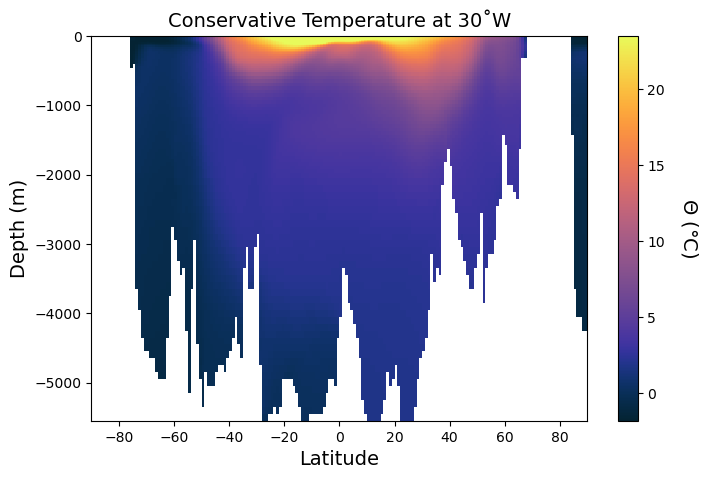

In [5]:
#Making the figure
fs=14 #fontsize
fig,ax=plt.subplots()
fig.set_size_inches(8,5)
cs=ax.pcolormesh(ds.lat,-ds.depth,Theta,vmin=-1.8,vmax=23.5, cmap=cmo.thermal)
cbar=plt.colorbar(cs)
plt.ylabel('Depth (m)',fontsize=fs)
plt.xlabel('Latitude',fontsize=fs)
plt.title('Conservative Temperature at 30˚W',fontsize=fs)
cbar.set_label(r'$\Theta$ ($\degree$C)',rotation=270,labelpad=25,fontsize=fs)

#Saving the figure
#plt.savefig('Atl_cons_theta_30W.pdf')

Now you try making the same plots but for salinity and oxygen. Remember to change the labels of the plots (including the units) and the colorbar limits!

In [6]:
ct_30w = ds['ct_an'].sel(lon=-30,method='nearest')
salt_30w = ds['s_an'].sel(lon=-30,method='nearest')
oxygen_30w = ds['o_an'].sel(lon=-30,method='nearest')
ct_170w = ds['ct_an'].sel(lon=-170,method='nearest')
salt_170w = ds['s_an'].sel(lon=-170,method='nearest')
oxygen_170w = ds['o_an'].sel(lon=-170,method='nearest')
prof_stats = {
    'ct_30w_min': ct_30w.min().values,
    'ct_30w_max': ct_30w.max().values,
    'ct_170w_min': ct_170w.min().values,
    'ct_170w_max': ct_170w.max().values,
    'sal_30w_min': salt_30w.min().values,
    'sal_30w_max': salt_30w.max().values,
    'sal_170w_min': salt_170w.min().values,
    'sal_170w_max': salt_170w.max().values,
    'o_30w_min': oxygen_30w.min().values,
    'o_30w_max': oxygen_30w.max().values,
    'o_170w_min': oxygen_170w.min().values,
    'o_170w_max': oxygen_170w.max().values,
}

# find the max and min values
if prof_stats['ct_30w_min'] < prof_stats['ct_170w_min']:
    ct_min = prof_stats['ct_30w_min']
else:
    ct_min = prof_stats['ct_170w_min']

if prof_stats['ct_30w_max'] > prof_stats['ct_170w_max']:
    ct_max = prof_stats['ct_30w_max']
else:
    ct_max = prof_stats['ct_170w_max']

if prof_stats['sal_30w_min'] < prof_stats['sal_170w_min']:
    sal_min = prof_stats['sal_30w_min']
else:
    sal_min = prof_stats['sal_170w_min']

if prof_stats['sal_30w_max'] > prof_stats['sal_170w_max']:
    sal_max = prof_stats['sal_30w_max']
else:
    sal_max = prof_stats['sal_170w_max']

if prof_stats['o_30w_min'] < prof_stats['o_170w_min']:
    o_min = prof_stats['o_30w_min']
else:
    o_min = prof_stats['o_170w_min']

if prof_stats['o_30w_max'] > prof_stats['o_170w_max']:
    o_max = prof_stats['o_30w_max']
else:
    o_max = prof_stats['o_170w_max']


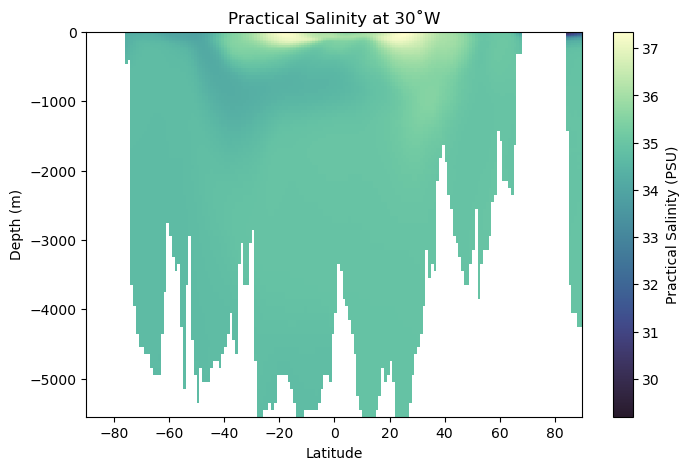

In [7]:

##CODE FOR SALINITY PLOT HERE
fig, ax = plt.subplots(1,1, figsize=(8,5))
c = ax.pcolormesh(ds.lat, -ds.depth, salt_30w, cmap=cmo.deep_r, vmin=sal_min, vmax=sal_max)
plt.colorbar(c, label='Practical Salinity (PSU)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('Practical Salinity at 30˚W')
fig.show()

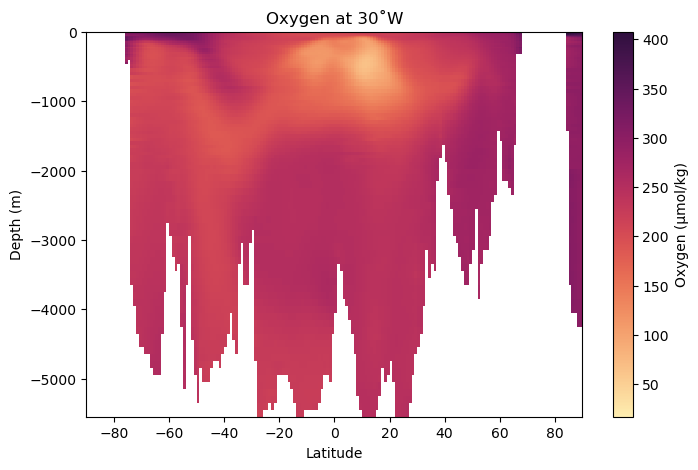

In [8]:
##CODE FOR OXYGEN PLOT HERE
fig, ax = plt.subplots(1,1, figsize=(8,5))
c = ax.pcolormesh(ds.lat, -ds.depth, oxygen_30w, cmap=cmo.matter, vmin=o_min, vmax=o_max)
plt.colorbar(c, label='Oxygen (μmol/kg)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('Oxygen at 30˚W')
fig.show()

#### Take a moment to look at your plots
Write down some general notes (in this notebook or anywhere else that you prefer taking notes) describing what you see. For example, where are the general areas of maximum and minimum values for each of the three variables? How do these relate to the large-scale wind-driven and overturning circulations and the general ocean surface forcing of heat and freshwater? Based on the plots, can you point out the rough location of some of the major water masses of the Atlantic Ocean, like North Atlantic Deep Water?

If it helps, you can make some quick plots to look at global ocean surface properties using the following bit of code, which would make a global map of temperature at the ocean's surface: ```ds['t_an'].sel(depth=0).plot()```

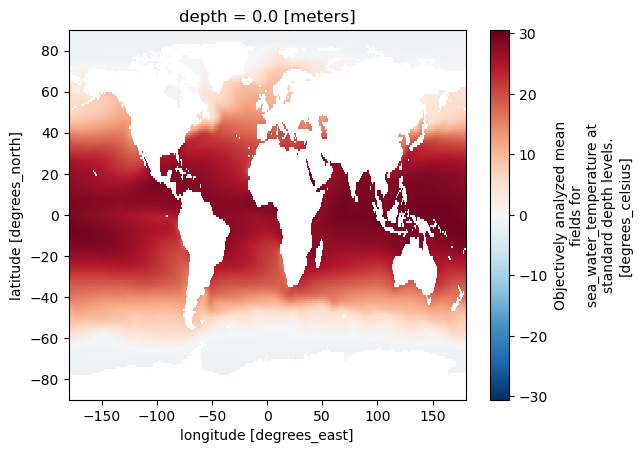

In [12]:
ds['t_an'].sel(depth=0).plot()

### The Pacific
Now make the exact same set of plots as you did for the Atlantic, but do them for the Pacific along 170˚W

Text(0.5, 1.0, 'Conservative Temperature at 170˚W')

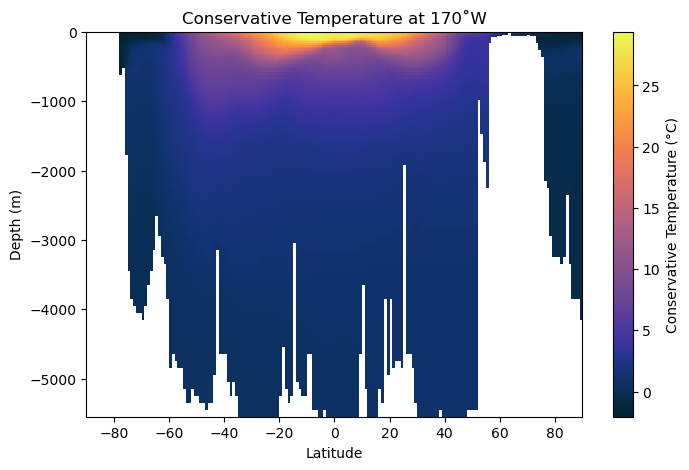

In [9]:
##CODE FOR CONSERVATIVE TEMPERATURE PLOT HERE
fig, ax = plt.subplots(1,1, figsize=(8,5))
c = ax.pcolormesh(ds.lat, -ds.depth, ct_170w, cmap=cmo.thermal, vmin=ct_min, vmax=ct_max)
plt.colorbar(c, label='Conservative Temperature (°C)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('Conservative Temperature at 170˚W')

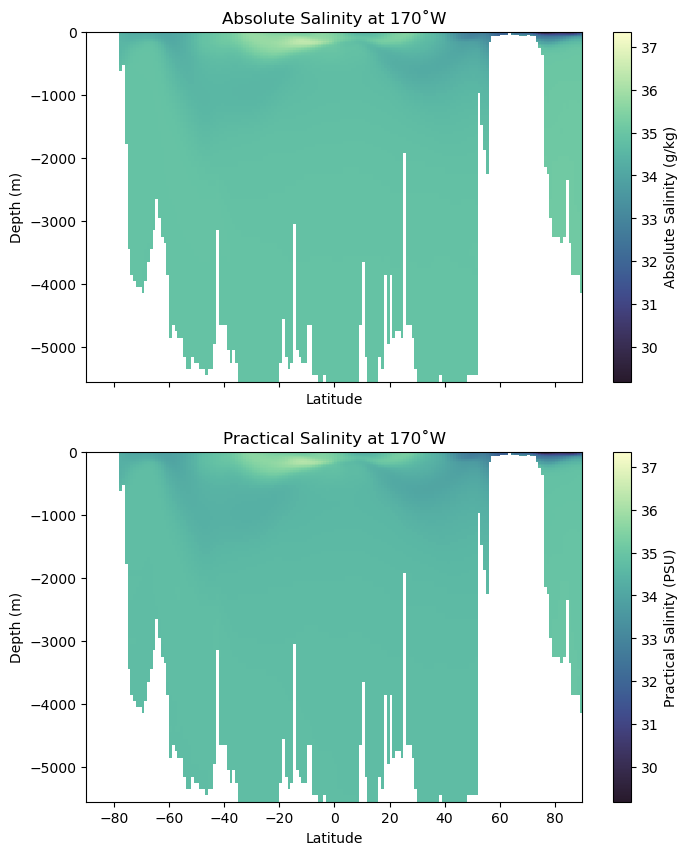

In [10]:
##CODE FOR ABSOLUTE SALINITY PLOT HERE
abs_sal = gsw.conversions.SA_from_SP(ds.s_an, p, ds.lon, ds.lat)
ds['abs_sal'] = abs_sal

asalt_170w = ds['abs_sal'].sel(lon=-170,method='nearest')

fig, ax = plt.subplots(2,1, figsize=(8,10), sharex=True)

s1 = ax[0].pcolormesh(ds.lat, -ds.depth, asalt_170w, cmap=cmo.deep_r, vmin=sal_min, vmax=sal_max)
plt.colorbar(s1, label='Absolute Salinity (g/kg)')
ax[0].set_xlabel('Latitude')
ax[0].set_ylabel('Depth (m)')
ax[0].set_title('Absolute Salinity at 170˚W')

s2 = ax[1].pcolormesh(ds.lat, -ds.depth, salt_170w, cmap=cmo.deep_r, vmin=sal_min, vmax=sal_max)
plt.colorbar(s2, label='Practical Salinity (PSU)')
ax[1].set_xlabel('Latitude')
ax[1].set_ylabel('Depth (m)')
ax[1].set_title('Practical Salinity at 170˚W')
fig.show()




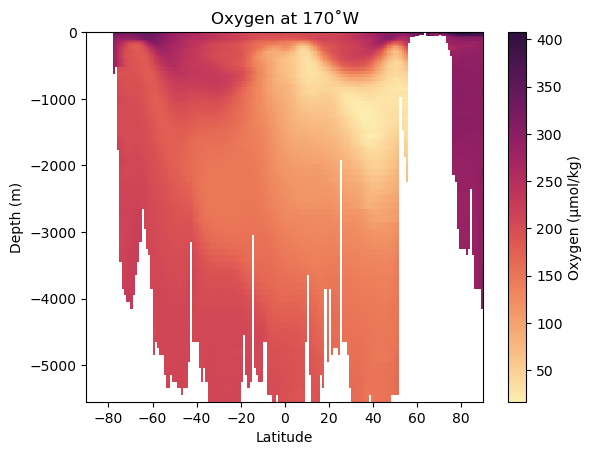

In [11]:
##CODE FOR OXYGEN PLOT HERE

fig, ax = plt.subplots(1,1)
c = ax.pcolormesh(ds.lat, -ds.depth, oxygen_170w, cmap=cmo.matter, vmin=o_min, vmax=o_max)
plt.colorbar(c, label='Oxygen (μmol/kg)')
ax.set_xlabel('Latitude')
ax.set_ylabel('Depth (m)')
ax.set_title('Oxygen at 170˚W')
fig.show()

#### Take a moment to look at your plots
Write down some general notes describing what you see. For example, where are the general areas of maximum and minimum values for each of the three variables? How do these relate to the large-scale wind-driven and overturning circulations and the general ocean surface forcing of heat and freshwater? Based on the plots, can you point out the rough location of some of the major water masses of the Pacific Ocean, like Antarctic Intermediate Water and Pacific Deep Water?